In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [3]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [4]:
data.groupby('weathersit')['season'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,2.498920,2.453441,2.952381
std,1.084872,1.146246,1.203170
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000
75%,3.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000


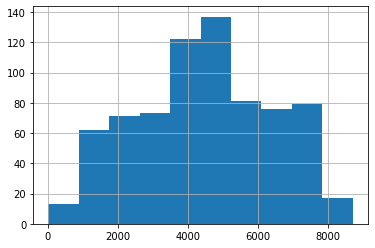

In [21]:
data['cnt'].hist();

In [5]:
from pylab import rcParams

In [6]:
rcParams['figure.figsize'] = (12, 10)

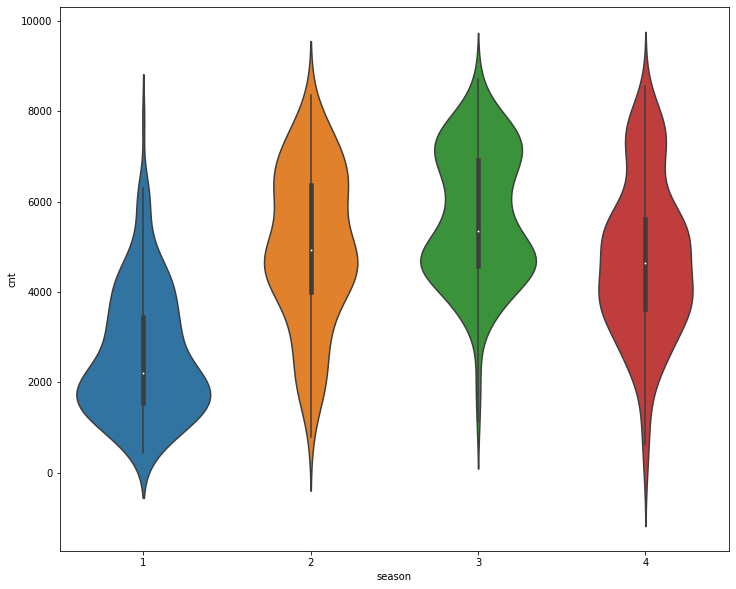

In [27]:

sns.violinplot(data['season'], data['cnt'])

In [7]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

In [29]:
X_df.shape

(731, 12)

<Figure size 864x720 with 0 Axes>

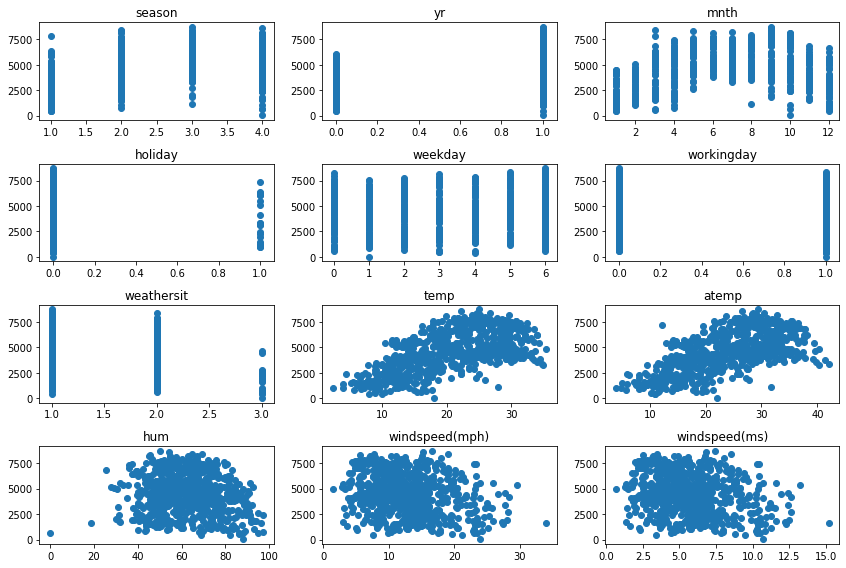

In [34]:
plt.subplots_adjust(bottom=0.5, top = 2 )
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);
plt.tight_layout()

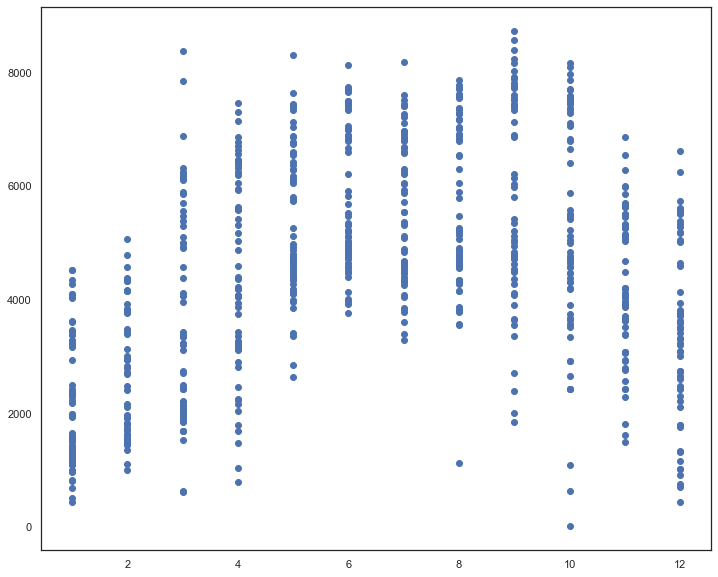

In [69]:
plt.scatter(data.mnth, data.cnt)

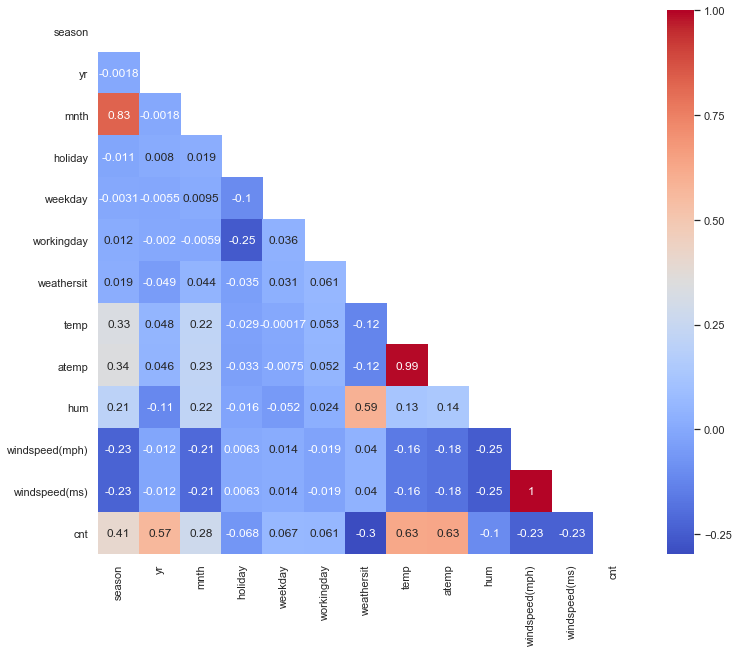

In [66]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style='white')
sns.heatmap(data.corr(),mask=mask, cmap='coolwarm',annot=True);

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV

In [9]:
X_df['sqmnth'] = X_df['mnth']

In [10]:
X_df['sqmnth'] = X_df['sqmnth'].apply(lambda x: x**2)

In [11]:
X_df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),sqmnth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1


In [12]:
ols = LinearRegression(normalize=True)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train  = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train  = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_valid_scaled = scaler.fit_transform(X_valid)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [19]:
y_ols_pred = ols.predict(X_valid)

In [28]:
y_ols_pred

array([6609.25035725, 6295.40312077, 6293.87275366, 6386.1713732 ,
       6045.04125688, 6740.18269898, 5943.2905394 , 6717.1894785 ,
       6476.15316165, 6374.90544719, 5740.06624603, 6772.17668644,
       6711.64583653, 6864.77236789, 7117.76489307, 6820.84782175,
       6112.79266574, 5726.69903122, 6324.81485915, 6694.2662972 ,
       6796.79548287, 6861.78881754, 6489.98305564, 5692.70954926,
       6858.38887905, 7254.95588208, 7752.02182013, 7533.7637128 ,
       7231.73319839, 7164.21877923, 6812.77683017, 6690.63720104,
       7063.87058582, 7405.39209403, 7892.05517641, 7356.80041664,
       7424.20066001, 7314.03786857, 7505.93825581, 7297.80867927,
       7711.2671534 , 7831.74574317, 7981.72049321, 7711.69048442,
       6445.62753909, 6623.55991126, 7202.26751304, 7377.63069405,
       7095.50339397, 6802.18081239, 7145.43160291, 7400.37920617,
       7754.16893691, 7689.88020123, 7515.225199  , 6292.68124058,
       5452.8448435 , 6391.1267365 , 7265.80830224, 7245.18461

In [29]:
y_valid

array([6536, 6591, 6043, 5743, 6855, 7338, 4127, 8120, 7641, 6998, 7001,
       7055, 7494, 7736, 7498, 6598, 6664, 4972, 7421, 7363, 7665, 7702,
       6978, 5099, 6825, 6211, 5905, 5823, 7458, 6891, 6779, 7442, 7335,
       6879, 5463, 5687, 5531, 6227, 6660, 7403, 6241, 6207, 4840, 4672,
       6569, 6290, 7264, 7446, 7499, 6969, 6031, 6830, 6786, 5713, 6591,
       5870, 4459, 7410, 6966, 7592, 8173, 6861, 6904, 6685, 6597, 7105,
       7216, 7580, 7261, 7175, 6824, 5464, 7013, 7273, 7534, 7286, 5786,
       6299, 6544, 6883, 6784, 7347, 7605, 7148, 7865, 4549, 6530, 7006,
       7375, 7765, 7582, 6053, 5255, 6917, 7040, 7697, 7713, 7350, 6140,
       5810, 6034, 6864, 7112, 6203, 7504, 5976, 8227, 7525, 7767, 7870,
       7804, 8009, 8714, 7333, 6869, 4073, 7591, 7720, 8167, 8395, 7907,
       7436, 7538, 7733, 7393, 7415, 8555, 6889, 6778, 4639, 7572, 7328,
       8156, 7965, 3510, 5478, 6392, 7691, 7570, 7282, 7109, 6639, 5875,
       7534, 7461, 7509, 5424, 8090, 6824, 7058, 74

In [20]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [21]:
def beatiful_coef(coefs, feature_names=X_df.columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values(by='coef',
                                                  ascending=False)
    

In [22]:
X_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'sqmnth'],
      dtype='object')

In [23]:
rmse(y_valid, y_ols_pred)

1101.511978020612

In [24]:
data['sqmnth'] = data['mnth']
data['sqmnth'] = data['sqmnth'].apply(lambda x: x**2)

In [25]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
windspeed(ms),6.980948e+11
yr,2.159012e+03
mnth,6.036432e+02
season,2.993750e+02
atemp,1.213470e+02
workingday,6.296686e+01
weekday,5.006428e+01
hum,-8.237666e+00
sqmnth,-4.249867e+01
temp,-5.571614e+01


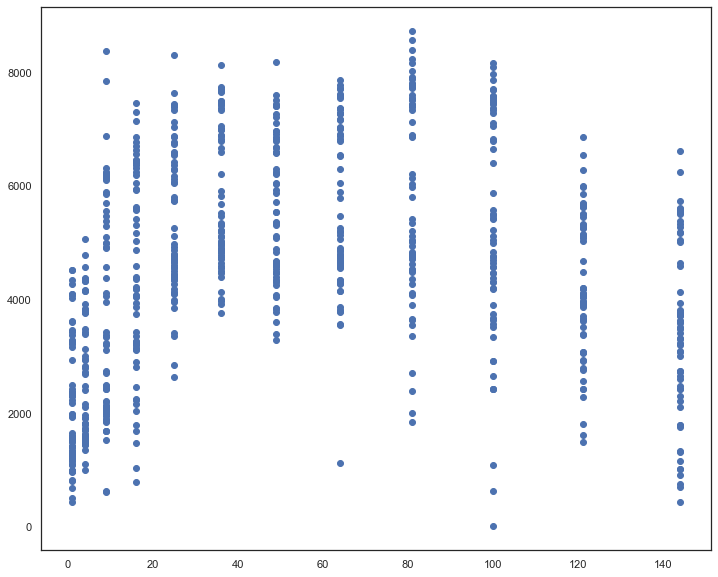

In [113]:
plt.scatter(data['sqmnth'], data['cnt'])

In [119]:
ridge = Ridge(random_state=17, normalize=True)

In [120]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=17, solver='auto', tol=0.001)

In [138]:
beatiful_coef(ridge.coef_, feature_names=X_df.columns)

,coef
yr,888.648413
season,127.465504
workingday,44.784062
temp,43.239431
atemp,40.656594
weekday,23.730175
mnth,19.217198
sqmnth,-0.560099
hum,-5.961223
windspeed(mph),-14.685865


In [124]:
ridge_valid_pred = ridge.predict(X_valid)

In [125]:
rmse(y_valid, ridge_valid_pred)

1699.386070116611

In [126]:
alphas = np.logspace(-4, 4, 100)

In [127]:
ridge_cv = RidgeCV(alphas=alphas,
                   cv=5, normalize=True).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [129]:
ridge_cv.alpha_

0.0013530477745798076

In [130]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [131]:
rmse(y_valid, best_ridge_valid_pred)

1098.2070885820233

In [132]:
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86831645.73626077, tolerance: 128334.29711741682
  positive)


In [133]:
lasso.alpha_

0.0001

In [134]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [135]:
rmse(y_valid, best_lasso_valid_pred)

1100.9600111116233

In [139]:
beatiful_coef(lasso.coef_,feature_names=X_df.columns)

,coef
yr,2159.596928
mnth,603.702759
season,298.937625
atemp,120.625379
workingday,63.245970
weekday,50.007325
windspeed(ms),-0.000000
hum,-8.242229
windspeed(mph),-37.304106
sqmnth,-42.499492


In [61]:
beatiful_coef(ridge_cv.coef_)

,coef
yr,2086.883298
season,354.849868
atemp,70.048003
temp,52.872890
weekday,50.868024
workingday,34.406998
mnth,12.867755
hum,-10.225210
windspeed(mph),-18.579682
windspeed(ms),-41.562749


In [140]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
forest = RandomForestRegressor(n_estimators=500, random_state=17)

In [153]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=17, verbose=0,
                      warm_start=False)

In [154]:
forest_valid_pred = forest.predict(X_valid)

In [155]:
rmse(y_valid, forest_valid_pred)

1046.7822306596709

In [156]:
beatiful_coef(forest.feature_importances_,feature_names=X_df.columns)

,coef
temp,0.296514
atemp,0.244777
yr,0.199311
hum,0.069859
season,0.061845
weathersit,0.030892
windspeed(ms),0.020472
weekday,0.019563
windspeed(mph),0.019514
sqmnth,0.014867
